<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
'''!pip install --upgrade matplotlib
O:
    Installing collected packages: matplotlib
  Found existing installation: matplotlib 2.2.2
    Uninstalling matplotlib-2.2.2:
      Successfully uninstalled matplotlib-2.2.2
Successfully installed matplotlib-2.2.3
'''

In [ ]:
'''
!pip install mpl_toolkits.basemap

Collecting mpl_toolkits.basemap
  Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: )
No matching distribution found for mpl_toolkits.basemap
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
'''

In [ ]:
'''
# This step is done from terminal window:
GANESH-PRO:Downloads ganeshpillai$ conda install basemap
...etc...
Downloading and Extracting Packages
geos-3.5.0           |  2.7 MB | ######################################### | 100% 
numpy-1.13.3         |  3.8 MB | ######################################### | 100% 
certifi-2018.8.13    |  138 KB | ######################################### | 100% 
basemap-1.0.7        | 118.5 MB | ######################################## | 100% 
conda-4.5.9          |  1.0 MB | ######################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
'''

In [ ]:
%matplotlib inline

         Category PdDistrict           X          Y  Catego_num  PdDis_num
0        WARRANTS   NORTHERN -122.425892  37.774599          37          4
1  OTHER OFFENSES   NORTHERN -122.425892  37.774599          21          4
2  OTHER OFFENSES   NORTHERN -122.424363  37.800414          21          4
3   LARCENY/THEFT   NORTHERN -122.426995  37.800873          16          4
4   LARCENY/THEFT       PARK -122.438738  37.771541          16          5
[16, 21, 20, 1, 7, 36, 35, 37, 4, 32]
['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY', 'SUSPICIOUS OCC']
16
21


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


20
1
7
36
35
37
4
32


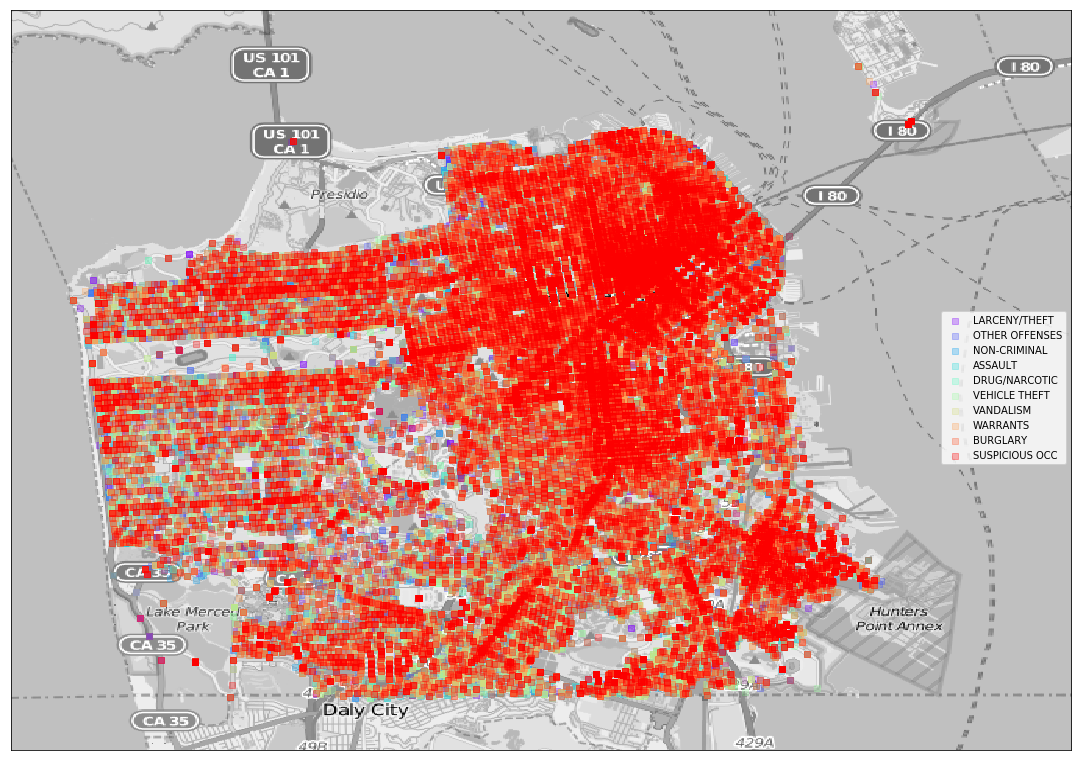

         Category PdDistrict           X          Y  Catego_num  PdDis_num
0        WARRANTS   NORTHERN -122.425892  37.774599          37          4
1  OTHER OFFENSES   NORTHERN -122.425892  37.774599          21          4
2  OTHER OFFENSES   NORTHERN -122.424363  37.800414          21          4
3   LARCENY/THEFT   NORTHERN -122.426995  37.800873          16          4
4   LARCENY/THEFT       PARK -122.438738  37.771541          16          5
[7, 3, 4, 0, 1, 9, 2, 8, 5, 6]
['SOUTHERN', 'MISSION', 'NORTHERN', 'BAYVIEW', 'CENTRAL', 'TENDERLOIN', 'INGLESIDE', 'TARAVAL', 'PARK', 'RICHMOND']
7
3
4
0
1
9
2
8
5
6


<Figure size 432x288 with 0 Axes>

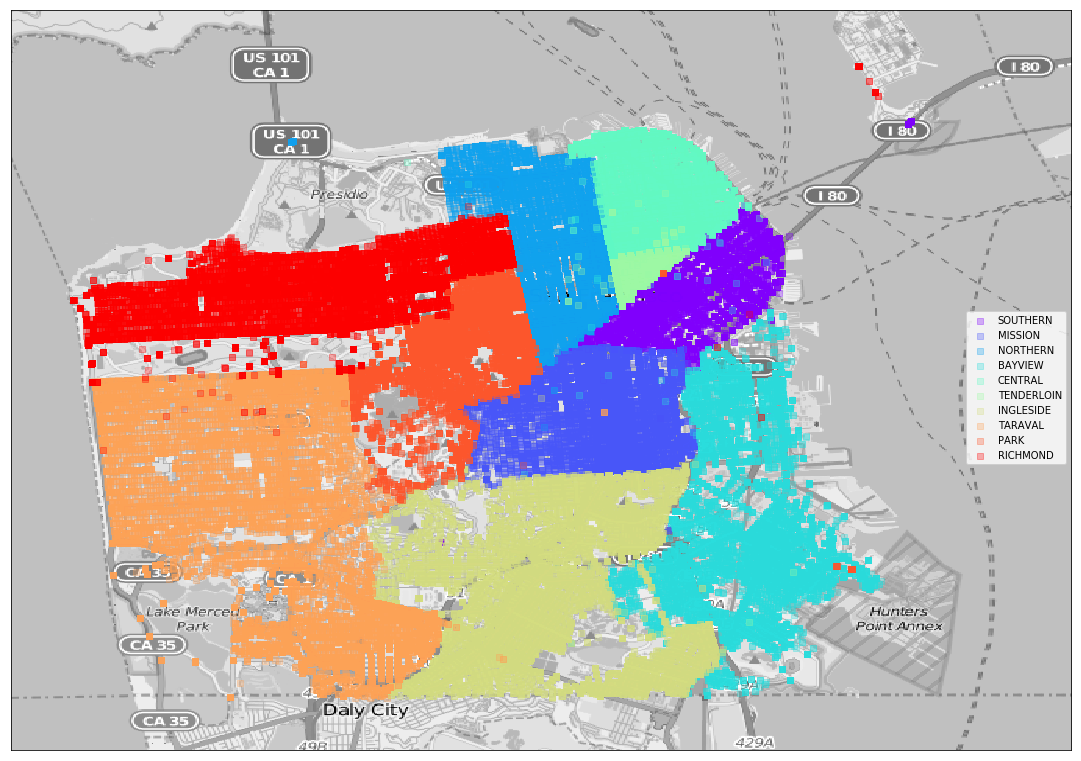

<Figure size 432x288 with 0 Axes>

In [5]:
def mapy_plotter(var):
    import operator
    import pandas as pd
    import numpy as np
    import random
    import matplotlib.pyplot as plt
    from PIL import Image
    from sklearn.preprocessing import LabelEncoder
    from mpl_toolkits.basemap import Basemap


    #Cargamos los datos en el DF
    train_df = pd.read_csv("/Users/pinky/Downloads/DATA/Kaggle/california_crime/train.csv")

    #Creamos el objeto para pasar de str a int
    labelenco = LabelEncoder()


    #Creamos las nuevas columnas con los valores str como int

    train_df['Catego_num'] = labelenco.fit_transform(train_df.Category)
    train_df['PdDis_num'] = labelenco.fit_transform(train_df.PdDistrict)

    train_df.drop(train_df.columns[[0,2,3,5,6]], axis=1, inplace=True)

    print(train_df.head())
    
    
    if var == 'Category':
        var_bis = 'Catego_num'
    if var == 'PdDistrict':
        var_bis = 'PdDis_num'



    #Creamos un diccionario con cada, Cuantos se han cometido y el Numero que tiene ese delito(Catego_num).
    dic = {}
    for elemnt in train_df[var].unique():
        dic[elemnt] = [len(train_df[var_bis][train_df[var] == elemnt]), train_df[var_bis][train_df[var] == elemnt].unique()[0]]
    

    #Los ordenamos para elegir visualmente los que más nos interesan
    sorted(dic.items(), key=lambda x:x[1])

    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)

    #Creamos un vercot con los i crimenes mñas representativos.
    cuentas = []
    nombres = []
    for i in range(0,10):
        cuentas.append(sorted_dic[i][1][1])
        nombres.append(sorted_dic[i][0])
    
    #if var == 'PdDistrict':
    #    cuentas = nombres
    
    print(cuentas)
    print(nombres)
    
    df = pd.DataFrame(train_df[train_df[var_bis].isin(cuentas)])
    
    #Interesante forma de cambiar el color de las lineas.
    color=iter(plt.cm.rainbow(np.linspace(0,1,len(cuentas))))


    #    ll.lon     ll.lat   ur.lon     ur.lat
    #    -122.52469 37.69862 -122.33663 37.82986

    #La grafica tiene que ser de gran tamaño para ver bien las calles. /
    #The plot needs to be big enoght to see well the streets:
    plt.figure(figsize=(19,14))

    #Creamos el mapa: /
    #We create the map:
    map = Basemap(projection='cyl',
                  resolution = 'h',
                  llcrnrlon = -122.52469, #Esquina inferior / ll.lon
                  llcrnrlat = 37.69862, #Esquina inferior / ll.lat
                  urcrnrlon = -122.33663, #Esquina superior / ur.lon
                  urcrnrlat = 37.82986, #Esquina superior / ur.lat
                  lat_0=37.752303,
                  lon_0=-122.445576)

    # Usamos una imagen satelite de SF como fondo. 
    # We use a satelite image of SF as background. Kaggle don't allow to download the image :-/
    #map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)

    
    for num in cuentas:
        colo=next(color)
        print(num)
        #We pick a random sample so the sample is not biased. 
        aleatorio = random.sample(range(0,len(df[df[var_bis]==num])), 20000)
        nombre = ''.join(train_df[var][train_df[var_bis]==num].unique())
            #print "%s de %s" %(c, len(df[df.Catego_num==cri]))        
        x, y = map(df[df[var_bis]==num].iloc[aleatorio].X, df[df[var_bis]==num].iloc[aleatorio].Y)
        mapa = map.scatter(x, y, marker=',', c=colo, alpha=0.3, label=nombre )
    plt.legend(scatterpoints=1, bbox_to_anchor=(1,0.6))
    
    mapdata = np.loadtxt("/Users/pinky/Downloads/DATA/Kaggle/california_crime/sf_map_copyright_openstreetmap_contributors.txt")
    plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent=[-122.52469, -122.33663, 37.69862, 37.82986])

    
    plt.show()
    if var == 'Category':
        plt.savefig('map_crime_Top_10.png')
    if var == 'PdDistrict':
        plt.savefig('map_PdDist.png')

mapy_plotter('Category')
mapy_plotter('PdDistrict')